In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

In [5]:
from ccai9012 import nn_utils, viz_utils

## Step 1: Load the housing price dataset from sklearn

In [6]:
# fetching califonia housing price dataset
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
X_california = california.data
y_california = california.target
print("California housing dataset loaded.")
print("Feature shape:", X_california.shape)
print("Target shape:", y_california.shape)
print("Feature names:", california.feature_names)

California housing dataset loaded.
Feature shape: (20640, 8)
Target shape: (20640,)
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [7]:
# Feature explanations for California Housing dataset:
# MedInc    : Median income in the area (in tens of thousands of dollars)
# HouseAge  : Average age of the houses in the area (in years)
# AveRooms  : Average number of rooms per household
# AveBedrms : Average number of bedrooms per household
# Population: Total population in the area
# AveOccup  : Average number of occupants per household
# Latitude  : Geographic latitude of the area
# Longitude : Geographic longitude of the area

# Target variable explanation:
# Target    : Median house value for households within the area (in units of 100,000 dollars)

# showcase the dataset
df = pd.DataFrame(X_california, columns=california.feature_names)
df['Target'] = y_california
df.to_csv("housing_price_california.csv")
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Step 2: Prepare input data for model training

In [8]:
# Normarlize data and prepare dataloaders
train_loader, val_loader, test_loader, scaler = nn_utils.prepare_dataloaders(
    X_california,
    y_california,
    batch_size=64,
    train_ratio=0.8,
    val_ratio=0.1
)

## Step 3: Model Build: Two-layer MLP

In [9]:
class SimpleMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, 1)  # regression output
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

input_dim = X_california.shape[1]  # 8 features
hidden_dim = 64         # can tune this

model = SimpleMLP(input_dim, hidden_dim)

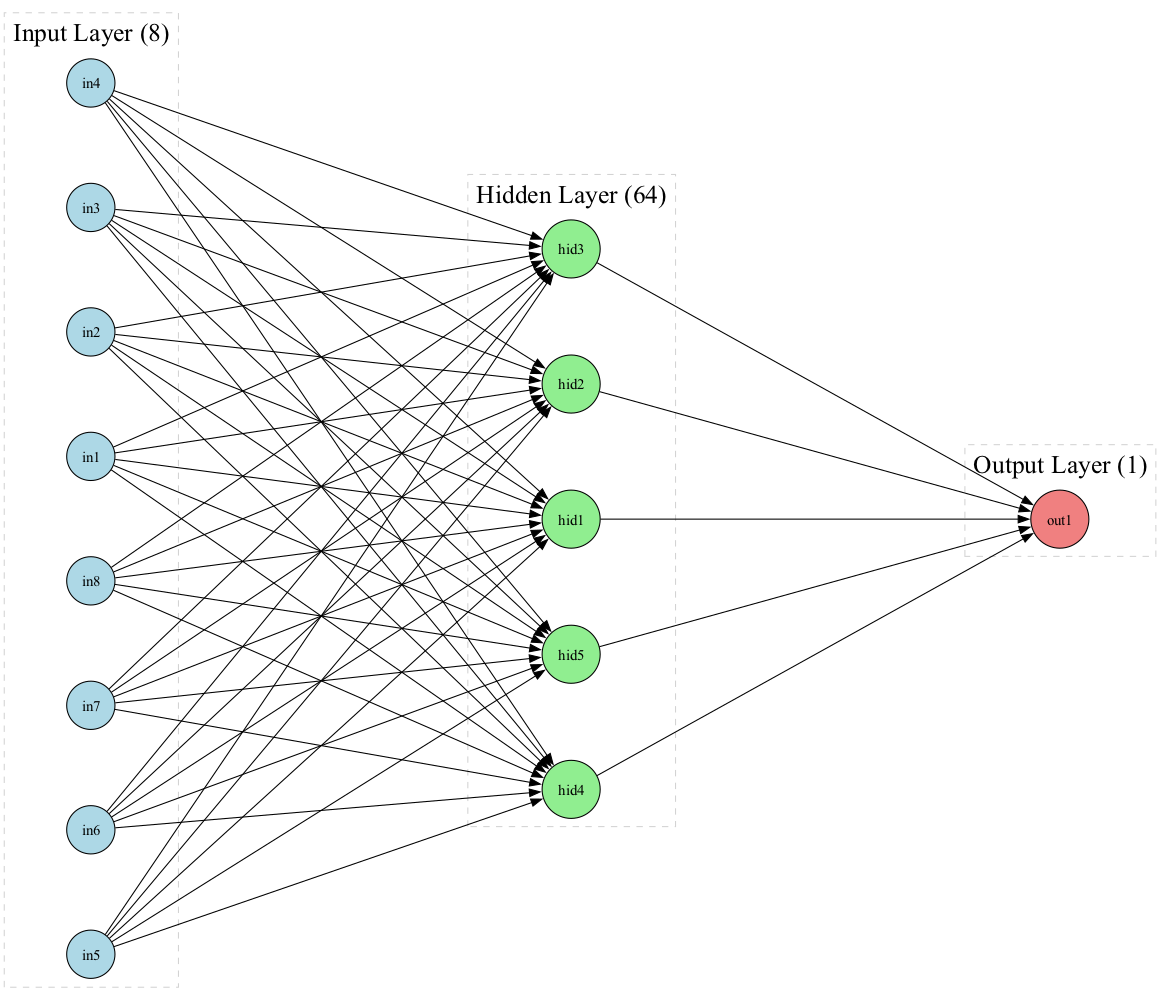

In [10]:
# Visualizing the model architecture
viz_utils.draw_simple_mlp(input_size=8,hidden_size=64,output_size=1,hidden_display=5)

## Step 4: Model Training

In [11]:
# Training Setup
learning_rate = 0.001  # step size for optimizer
num_epochs = 50        # number of passes over entire dataset
criterion = nn.MSELoss()  # Mean Squared Error loss for regression
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [12]:
train_losses, val_losses = nn_utils.train_model(
    model, 
    train_loader, 
    val_loader, 
    optimizer, 
    criterion, 
    num_epochs
)

Epoch [1/50] - Train Loss: 1.5035, Val Loss: 0.6674
Epoch [2/50] - Train Loss: 0.5816, Val Loss: 0.5203
Epoch [3/50] - Train Loss: 0.4801, Val Loss: 0.4520
Epoch [4/50] - Train Loss: 0.4325, Val Loss: 0.4204
Epoch [5/50] - Train Loss: 0.4120, Val Loss: 0.4023
Epoch [6/50] - Train Loss: 0.3991, Val Loss: 0.3926
Epoch [7/50] - Train Loss: 0.3917, Val Loss: 0.3844
Epoch [8/50] - Train Loss: 0.3847, Val Loss: 0.3766
Epoch [9/50] - Train Loss: 0.3821, Val Loss: 0.3713
Epoch [10/50] - Train Loss: 0.3740, Val Loss: 0.3692
Epoch [11/50] - Train Loss: 0.3718, Val Loss: 0.3623
Epoch [12/50] - Train Loss: 0.3678, Val Loss: 0.3588
Epoch [13/50] - Train Loss: 0.3667, Val Loss: 0.3556
Epoch [14/50] - Train Loss: 0.3616, Val Loss: 0.3510
Epoch [15/50] - Train Loss: 0.3596, Val Loss: 0.3487
Epoch [16/50] - Train Loss: 0.3551, Val Loss: 0.3460
Epoch [17/50] - Train Loss: 0.3538, Val Loss: 0.3414
Epoch [18/50] - Train Loss: 0.3487, Val Loss: 0.3375
Epoch [19/50] - Train Loss: 0.3478, Val Loss: 0.3373
Ep

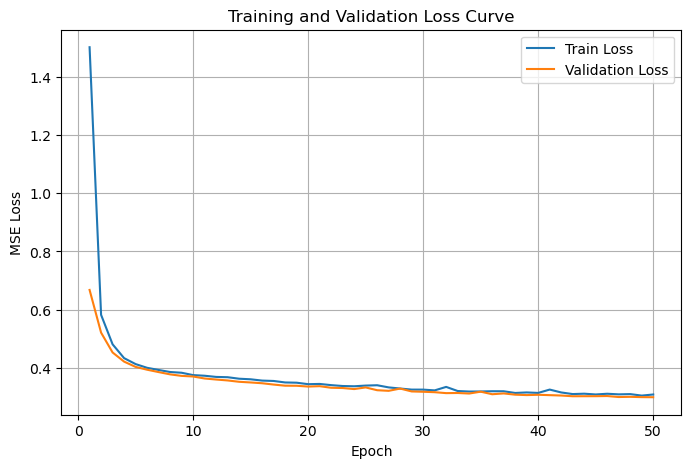

In [13]:
# Plot Training and Validation Loss
viz_utils.plot_loss_curve(train_losses, val_losses)

## Step 5: Test Model Performance

MSE: 0.3312
RMSE: 0.5755
MAE: 0.3906
MAPE: 21.92%
R^2 Score: 0.7537


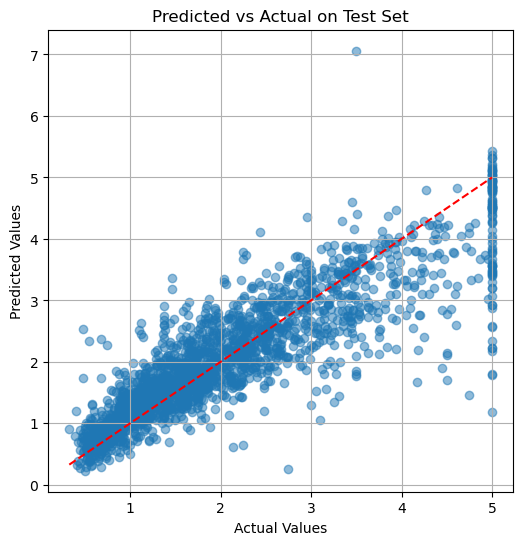

In [14]:
results = nn_utils.evaluate_regression_model(
    model,
    test_loader,
    show_examples=True,
    metrics=['rmse', 'mse', 'mae', 'mape']
)